In [ ]:
# Matplotlib Challenge
# UT-TOR-DATA-PT-01-2020-U-C Homework 5
# (c) Boris Smirnov

# Observations and Insights

## 1. Choosing the criterion for drug regimen ranking

* The assignment suggests the following list of the most promising treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin. Looking at this list and at the summary pivot table, I suspect the it was formed based on the average tumor volume at the end of the trial. Based on this criterion, #5 drug on the list would be Zoniferol - it has marginally larger average tumor volume then Infubinol (though slightly better result if comparing median values). However, Zoniferol shows much better survival rate - 14 mice versus only 9 with Infubinol.
* Changing the ranking criterion to number of mice that survived until the end of the trial produces slightly different list: Capomulin, Ramicane, Zoniferol, Ceftamin.
* Two headliners, Capomulin and Ramicane, remained the same with significantly better results then the other two drugs in the top 4. Zoniferol, that replaced Infubinol, was ranked #3. Infubinol dropped to the end of the list next to Propriva.
* All the analysis in this assignment were done using this new criterion of comparing drug regimens.

## 2. Mouse Weight vs Tumor Growth correlation

Coefficient of determination 0.85 between mouse weight and tumor volume signifies that there might be a strong correlation between these two factors. The more corpulent was a mouse, the bigger was a tumor, which in turn might siggest that treatment of heavier subjects would probably take longer or should require higher dosages of a drug.

## 3. Survival rate of female subjects

There is a difference of 4.8 percentage points between survival rate of male and female subject mice. That is female mice have noticeably less survival rate compared to male mice. This might signify that female subjects are less responsive to the treatment or SCC (squamous cell carcinoma) might take more severe forms in females.

# Dependencies and starter code

In [1]:
%matplotlib notebook

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_csv = "data/Mouse_metadata.csv"
study_results_csv = "data/Study_results.csv"

In [3]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_csv)
study_results = pd.read_csv(study_results_csv)

In [4]:
# Combine the data into a single dataset and verify its consistensy
combined_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how='outer')
combined_df.count() # Looks OK, no missing values

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

## Data Discrepancy Issue

* study_results report one mouse more than mouse_metadata

In [5]:
(mouse_metadata['Mouse ID'].count(), study_results.loc[study_results['Timepoint'] == 0, 'Mouse ID'].count())

(249, 250)

* In search of the culprit:

In [6]:
study_results.loc[study_results['Timepoint'] == 0, 'Mouse ID'].value_counts().head(1)

g989    2
Name: Mouse ID, dtype: int64

In [7]:
combined_df.loc[(combined_df['Mouse ID'] == 'g989'), :]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


### Analysing the situation

* It seems, that the same id was used for 2 different mice: their 'Tumor Volume (mm3)' parameters are different.

* This id duplication affected 2 drug regimens: Propriva and Stelasyn. The former was tested on 26 mice, the later on 24. The rest of the drug regimens were tested on 25 mice. The differense in the amount of test subjects was 4%.

* The data shows that Propriva regimen was a clear outsider in this trial. Other drug, Stelasyn, having one mouse more, could potentially have shown better result, however even if this would be the case, it's result wouldn't have been even in top 5.

* Thus, I beleive, that this discrepancy doesn't significantly affect the results of the whole trial and can be ignored.


* P.S. Both "twins" didn't make to the end of the trial :(

## Summary statistics

In [10]:
# Generate a summary stats table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

summary_stats_df = pd.pivot_table(
    combined_df, index=['Drug Regimen', 'Timepoint'],
    values=['Mouse ID', 'Tumor Volume (mm3)'],
    aggfunc={
        'Mouse ID': lambda s: len(s),
        'Tumor Volume (mm3)': [np.mean, np.median, np.var, np.std, st.sem]
    })

summary_stats_df.rename(
    columns={
        'Mouse ID': 'Mice',
        '<lambda>': 'Count',
        'mean': 'Mean',
        'median': 'Median',
        'var': 'Variance',
        'std': 'Standard Deviation',
        'sem': 'SEM'
    },
    inplace=True
)

last_timepoint = study_results['Timepoint'].max() # Timepoint of the end of the trial

summary_stats_df

Mice Tumor Volume (mm3)                       \
                       Count               Mean     Median       SEM   
Drug Regimen Timepoint                                                 
Capomulin    0            25          45.000000  45.000000  0.000000   
             5            25          44.266086  45.597064  0.448593   
             10           25          43.084291  43.421014  0.702684   
             15           24          42.064317  42.798160  0.838617   
             20           23          40.716325  40.716428  0.909731   
...                      ...                ...        ...       ...   
Zoniferol    25           16          55.432935  55.676604  0.602513   
             30           15          57.713531  57.419744  0.800043   
             35           14          60.089372  60.365832  0.881426   
             40           14          62.916692  62.274543  0.998515   
             45           14          65.960888  65.684689  1.003576   

                                                      
                       Standard Deviation   Variance  
Drug Regimen Timepoint                                
Capomulin    0                   0.000000   0.000000  
             5                   2.242964   5.030889  
             10                  3.513422  12.344133  
             15                  4.108369  16.878693  
             20                  4.362915  19.035028  
...                                   ...        ...  
Zoniferol    25                  2.410052   5.808348  
             30                  3.098552   9.601024  
             35                  3.297993  10.876760  
             40                  3.736102  13.958456  
             45                  3.755037  14.100301  

[100 rows x 6 columns]

## Bar plots

1. Generate a bar plot showing number of data points for each treatment regimen using pandas

In [11]:
# As a principal data point in this trial I choose the number of mice for each treatment regimen and its dinamics with time.
# Basically, I use the number of mice that survived until the end of the trial as a criterion of successful treatment
# Here I compare number of mice at the beginning and at the end of the trial for each regimen

trial_mice_count_df = pd.merge(
    summary_stats_df.loc[(slice(None), 0), 'Mice'].droplevel('Timepoint'),
    summary_stats_df.loc[(slice(None), last_timepoint), 'Mice'].droplevel('Timepoint'),
    left_index=True, right_index=True)

trial_mice_count_df.columns = ['Start Count', 'End Count']
trial_mice_count_df

,Start Count,End Count
Drug Regimen,,
Capomulin,25,21
Ceftamin,25,13
Infubinol,25,9
Ketapril,25,11
Naftisol,25,13
Placebo,25,11
Propriva,26,7
Ramicane,25,20
Stelasyn,24,11


<IPython.core.display.Javascript object>


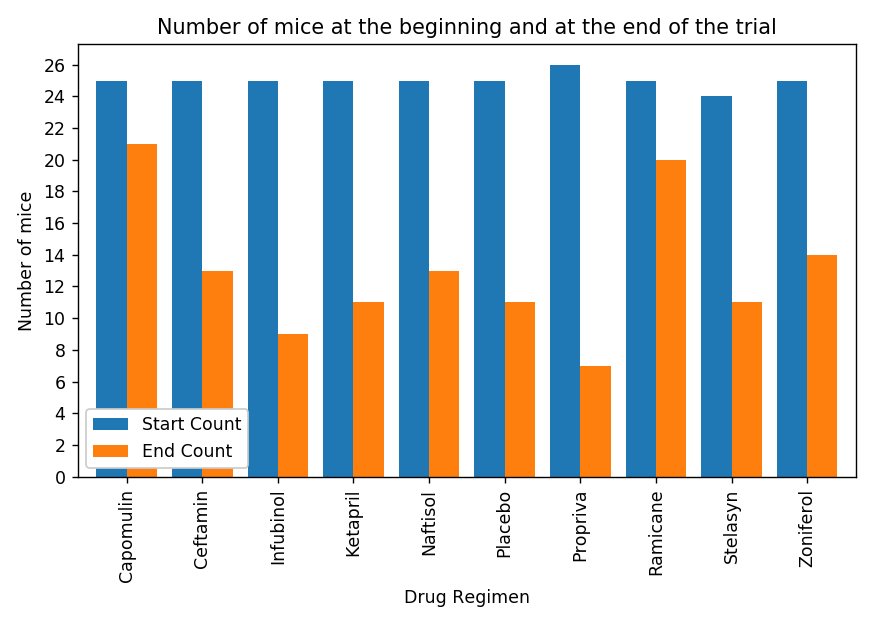

In [12]:
# Generate a bar plot showing number of data points for each treatment regimen

# 2a. Charting with pd.DataFrame.plot
y_ticks = np.arange(0, 28, 2)

mice_chart = trial_mice_count_df.plot(
    title="Number of mice at the beginning and at the end of the trial",
    kind='bar', figsize=(7, 5), legend=True, width=0.8,
    yticks=[t for t in y_ticks]
)

mice_chart.set_ylabel('Number of mice')
mice_chart_props = mice_chart.properties()
bar_width = mice_chart_props['children'][0].get_width()

plt.legend(loc='lower left', framealpha=1)
plt.show()
plt.tight_layout()

<IPython.core.display.Javascript object>


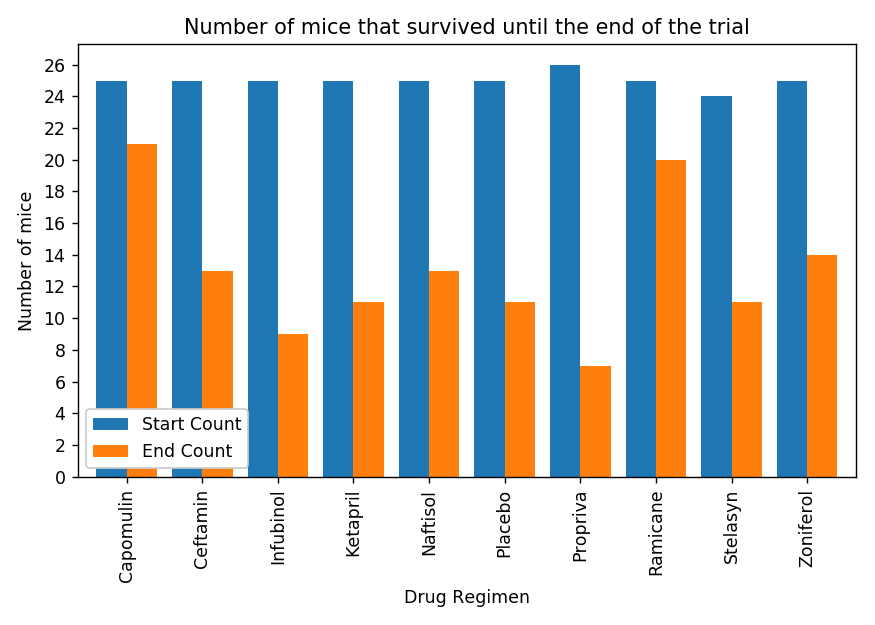

In [13]:
# 2b. Charting with pyplot.plot

plt.figure(figsize=(7,5))

x_axis = np.arange(len(trial_mice_count_df))

plt.bar(x_axis, trial_mice_count_df["Start Count"], align='edge', width=-bar_width)

plt.bar(x_axis, trial_mice_count_df["End Count"], align='edge', width=bar_width)

plt.title("Number of mice that survived until the end of the trial")

plt.xticks([t for t in x_axis], trial_mice_count_df.index, rotation="vertical")
plt.xlabel("Drug Regimen")

plt.yticks([t for t in range(0, 28, 2)])
plt.ylabel("Number of mice")

plt.xlim(-0.65, 9.65) # mice_chart.get_xlim() - to make charts look identical

plt.legend(labels=['Start Count', 'End Count'], loc='lower left', framealpha=1)
plt.show()
plt.tight_layout()

## Pie plots

In [14]:
# Preparing data set
mouse_sex_df = pd.DataFrame({
    'Before Trial': combined_df.loc[combined_df['Timepoint'] == 0, 'Sex'].value_counts(),
    'After Trial':  combined_df.loc[combined_df['Timepoint'] == last_timepoint, 'Sex'].value_counts()
})

mouse_sex_df

,Before Trial,After Trial
Female,125,62
Male,125,68


<IPython.core.display.Javascript object>


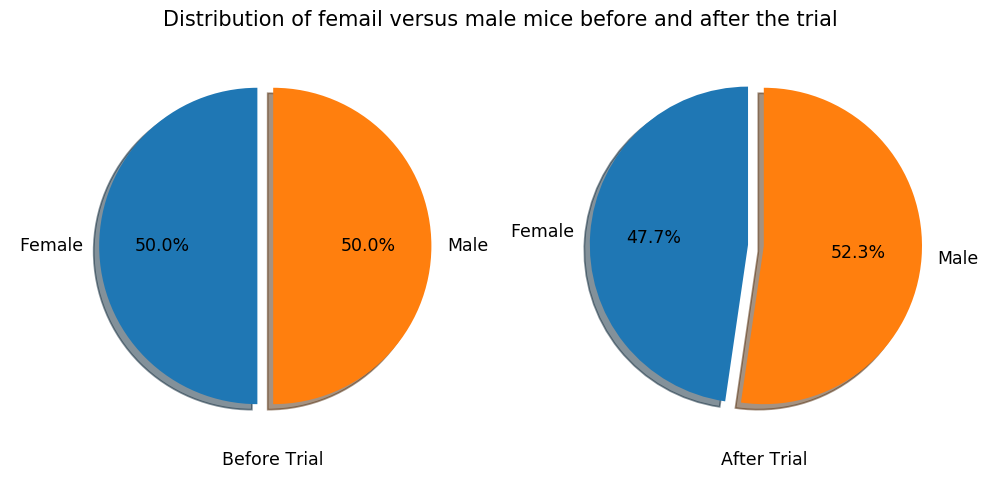

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

mouse_sex_plt = mouse_sex_df.plot(
    title="Distribution of femail versus male mice before and after the trial",
    kind='pie', subplots=True, figsize=(8, 4), legend=False,
    explode=(0.1, 0), shadow=True, startangle=90, autopct="%1.1f%%"
)

mouse_sex_plt[0].set_xlabel('Before Trial')
mouse_sex_plt[0].set_ylabel('')
mouse_sex_plt[1].set_xlabel('After Trial')
mouse_sex_plt[1].set_ylabel('')

plt.show()
plt.tight_layout()

<IPython.core.display.Javascript object>


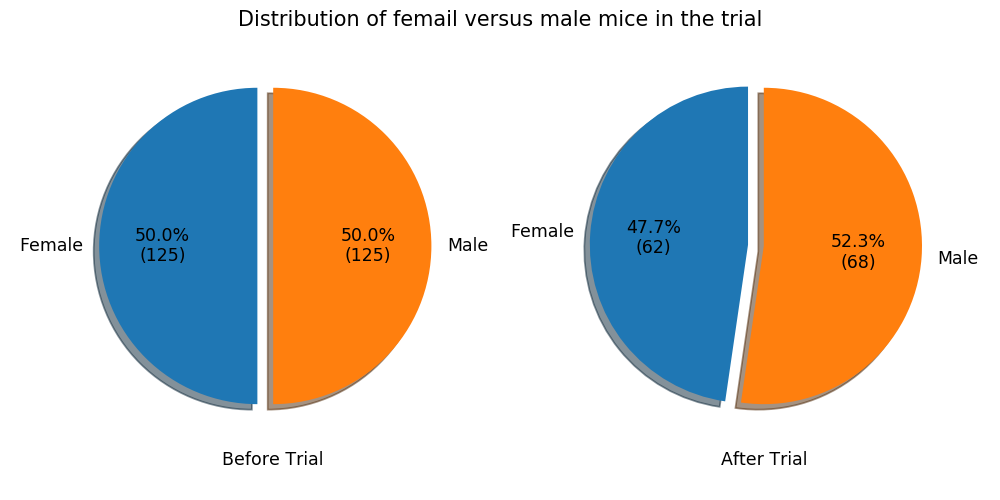

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

fig, axs = plt.subplots(1, 2, figsize=(8, 4))

fig.suptitle("Distribution of femail versus male mice in the trial")

axs[0].pie(
    mouse_sex_df['Before Trial'], labels=mouse_sex_df.index,
    explode=(0.1, 0), shadow=True, startangle=90,
    autopct=lambda pct: "{:.1f}%\n({:d})".format(pct, int(pct/100.*mouse_sex_df['Before Trial'].sum()))
)

axs[1].pie(
    mouse_sex_df['After Trial'], labels=mouse_sex_df.index,
    explode=(0.1, 0), shadow=True, startangle=90,
    autopct=lambda pct: "{:.1f}%\n({:d})".format(pct, int(pct/100.*mouse_sex_df['After Trial'].sum()))
)

axs[0].set_xlabel('Before Trial')
axs[1].set_xlabel('After Trial')

plt.show()
plt.tight_layout()

## Quartiles, outliers and boxplots

In [22]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens.
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

# 1. Preparing dataset
top_four_regimens = trial_mice_count_df.sort_values(by='End Count', ascending=False).iloc[0:4, :].index

top_four_regimens

Index(['Capomulin', 'Ramicane', 'Zoniferol', 'Ceftamin'], dtype='object', name='Drug Regimen')

In [30]:
final_tumor_volumes = []

for reg in top_four_regimens:

    # Get data frame for particular regimen
    final_tumor_vol_df = combined_df.loc[
        (combined_df['Timepoint'] == last_timepoint) & (combined_df['Drug Regimen'] == reg),
        'Tumor Volume (mm3)']
    
    # Adding artificial outliers for testing fliers customization on the box-and-whiskers diagram
    #final_tumor_vol_df = final_tumor_vol_df.append(pd.Series([10, 90], index=[0, 2000]))
    
    final_tumor_volumes.append(final_tumor_vol_df)

    # Calculate quartile, IQR, etc
    quartiles = final_tumor_vol_df.quantile([.25, .50, .75])

    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]

    iqr = upperq - lowerq

    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)

    outliers = final_tumor_vol_df.loc[(final_tumor_vol_df < lower_bound) | (final_tumor_vol_df > upper_bound)]

    print(f"Number of Tumor Volume outliers for {reg} regimen: {outliers.count()}")


Number of Tumor Volume outliers for Capomulin regimen: 0
Number of Tumor Volume outliers for Ramicane regimen: 0
Number of Tumor Volume outliers for Zoniferol regimen: 0
Number of Tumor Volume outliers for Ceftamin regimen: 0


<IPython.core.display.Javascript object>


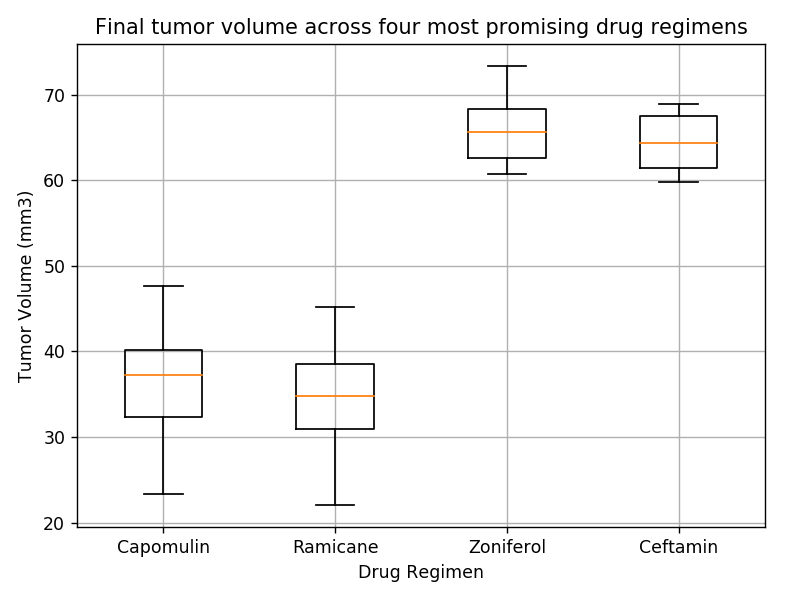

In [31]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig, ax = plt.subplots()

result_dict = ax.boxplot(final_tumor_volumes, labels=top_four_regimens)

# Customize fliers
markers = ['o', 's', 'D', '^']
markerfacecolor = ['red', 'green', 'blue', 'orange']

for i, f in enumerate(result_dict['fliers']):
    f.set_marker(markers[i])
    f.set_markerfacecolor(markerfacecolor[i])

ax.set_title('Final tumor volume across four most promising drug regimens')
ax.set_xlabel("Drug Regimen")
ax.set_ylabel("Tumor Volume (mm3)")
ax.grid()

plt.show()
plt.tight_layout()

## Line and scatter plots

In [32]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

# 1. Preparing dataset (random mouse and average across all mice treated with Capomulin)
sample_mouse = combined_df.loc[
    (combined_df['Timepoint'] == last_timepoint) & (combined_df['Drug Regimen'] == 'Capomulin'),
    'Mouse ID'].sample(1)

mouse_name = sample_mouse.values[0]

sample_mouse_df = combined_df.loc[
        combined_df['Mouse ID'] == mouse_name, ['Timepoint', 'Tumor Volume (mm3)']
    ].set_index('Timepoint')

sample_mouse_df['Average Tumor Volume (mm3)'] = summary_stats_df.loc['Capomulin', ('Tumor Volume (mm3)', 'Mean')]

sample_mouse_df

,Tumor Volume (mm3),Average Tumor Volume (mm3)
Timepoint,,
0,45.000000,45.000000
5,45.895647,44.266086
10,46.749006,43.084291
15,44.440949,42.064317
20,39.070214,40.716325
25,37.342210,39.939528
30,32.868916,38.769339
35,33.515671,37.816839
40,33.949341,36.958001


<IPython.core.display.Javascript object>


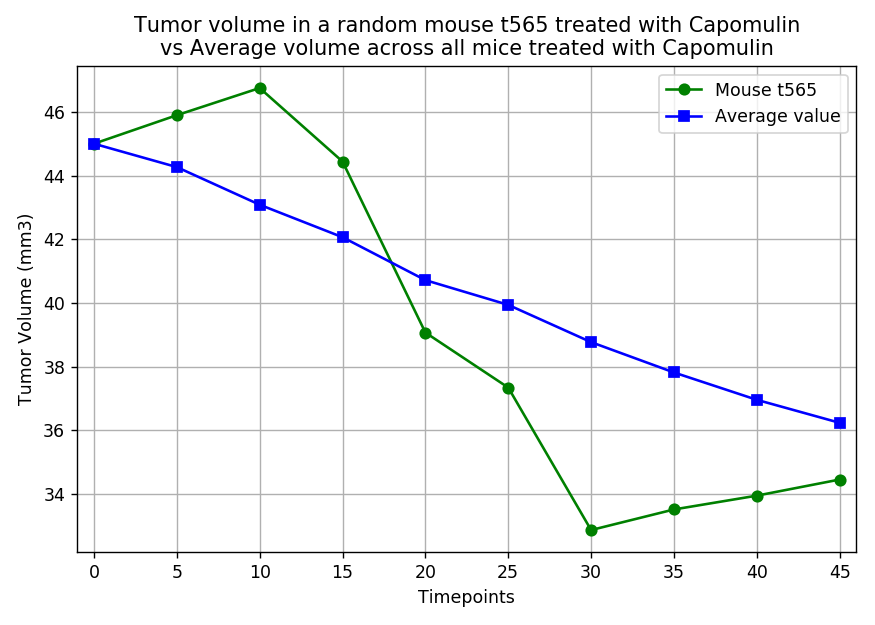

In [33]:
# 2. Charting

plt.figure(figsize=(7,5))

plt.title(f"Tumor volume in a random mouse {mouse_name} treated with Capomulin\n" \
          "vs Average volume across all mice treated with Capomulin")

plt.xticks([x for x in sample_mouse_df.index])
plt.xlabel("Timepoints")
plt.xlim(-1, 46)

plt.ylabel("Tumor Volume (mm3)")

plt.plot(
    sample_mouse_df.index, sample_mouse_df['Tumor Volume (mm3)'],
    label=f"Mouse {mouse_name}", color="green", marker='o'
)

plt.plot(
    sample_mouse_df.index, sample_mouse_df['Average Tumor Volume (mm3)'],
    label=f"Average value", color="blue", marker='s'
)

plt.grid()
plt.legend(loc="best")

plt.show()
plt.tight_layout()

In [34]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

# 1. Preparing dataset
weight_vs_tumor_df = combined_df.loc[
    (combined_df['Timepoint'] == last_timepoint) & (combined_df['Drug Regimen'] == 'Capomulin'),
    ['Weight (g)', 'Tumor Volume (mm3)']]

<IPython.core.display.Javascript object>


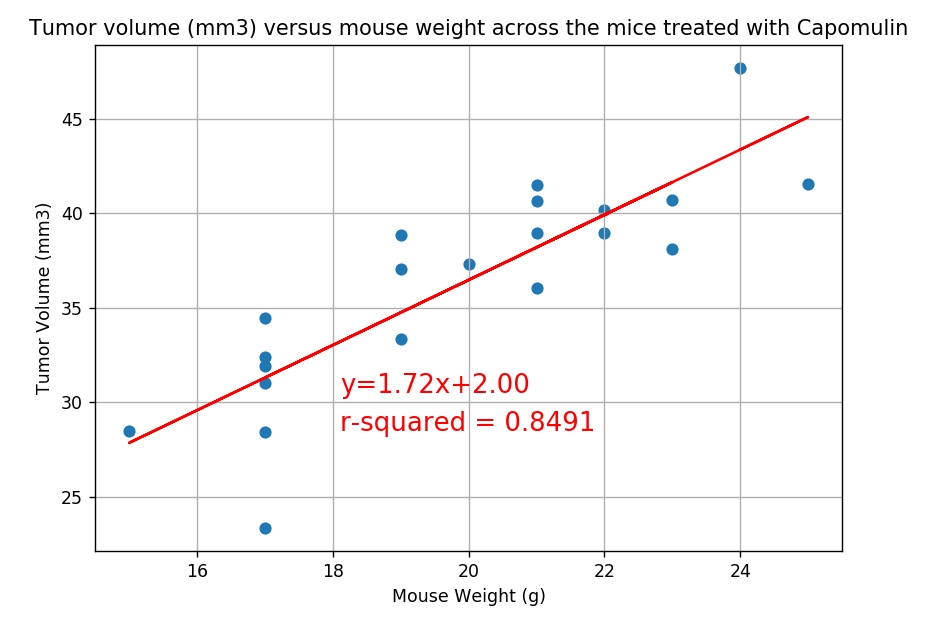

In [64]:
# 2. Charting
plt.figure(figsize=(7.5,5))

plt.title(f"Tumor volume (mm3) versus mouse weight across the mice treated with Capomulin")

plt.scatter(weight_vs_tumor_df['Weight (g)'], weight_vs_tumor_df['Tumor Volume (mm3)'])
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.grid()


In [65]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume
# for the Capomulin regimen

(slope, intercept, rvalue, pvalue, stderr) = \
    st.linregress(weight_vs_tumor_df['Weight (g)'], weight_vs_tumor_df['Tumor Volume (mm3)'])

repress_points = [slope * x + intercept for x in weight_vs_tumor_df['Weight (g)']]
plt.plot(weight_vs_tumor_df['Weight (g)'], repress_points, "r-")

line_eq = "y={:.2f}x{:+.2f}".format(slope, intercept)
plt.annotate(line_eq, (18.1, 30.5), fontsize=15, color="red")

r_squared = "r-squared = {:.4f}".format(rvalue)
plt.annotate(r_squared, (18.1, 28.5), fontsize=15, color="red")

plt.show()
plt.tight_layout()